# Event-related fields

Event-related fields (ERFs) as well as event-related potentials are generated by neuronal activity elicited by a given events. They are often used in cognitive and clinical neurosciene to quantify the brain activity associated with a given task (Luck 2014, Woodman 2010). The aim of this section is to generate event-related fields (ERFs) in response to the visual input and to do some simple plotting of time course and topographies. Event-related fields are generated by neuronal activity phase-locked to a given event.
Preparation

In [1]:
import os.path as op
import os
import mne
from mne_bids import BIDSPath, read_raw_bids 
from mne.viz import plot_evoked_topo
import matplotlib.pyplot as plt
import numpy as np


File overview

The chapter relies on the input file (embedded in the BIDS structure):

< BIDS_ROOT >/derivatives/Analysis/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-12_epo.fif

See the local paths of the data:


In [2]:
subject = '01'
session = '01'
task = 'SpAtt'  
run = '12'  
meg_suffix = 'meg'
epo_suffix = 'epo'

data_path='/home/rakshita/rds_folders/Sproject3/OPM_data'
deriv_root=op.join(data_path,"Sub3_BIDS_copy/derivatives/analysis")
#deriv_root=op.join(data_path,"BIDSRec_main/derivatives/analysis")
bids_path = BIDSPath(subject=subject, session=session,
            task=task, run=run, suffix=epo_suffix, datatype='meg',
            root=deriv_root, extension='.fif', check=False)
print(bids_path.basename,bids_path.fpath)

sub-01_ses-01_task-SpAtt_run-12_epo.fif /home/rakshita/rds_folders/Sproject3/OPM_data/Sub3_BIDS_copy/derivatives/analysis/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-12_epo.fif


## Read the epochs

In [3]:
epochs = mne.read_epochs(bids_path.fpath,
                         proj = False,
                         preload=True,
                         verbose=False)


## Averaging the trial data

Identify the epochs for the left condition with respect to the onset of the moving gratings and then average over trials. Subsequently apply a lowpass filter at 30 Hz and crop the data to the time interval from -100 to 400 ms from stimulus onset. The 30 Hz low-pass filter is typically used for cognitive type event-related responses.


In [4]:
evoked_left= epochs['cue_left'].copy().average(method='mean').filter(0.0, 30).crop(-0.1,0.4)

Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



## Plotting event-related fields

To plot the single trials and the averaged event-related fields for a single magnetometer write:


Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 441 samples (0.441 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    1.0s
[Parallel(n_job

Not setting metadata
159 matching events found
No baseline correction applied
0 projection items activated


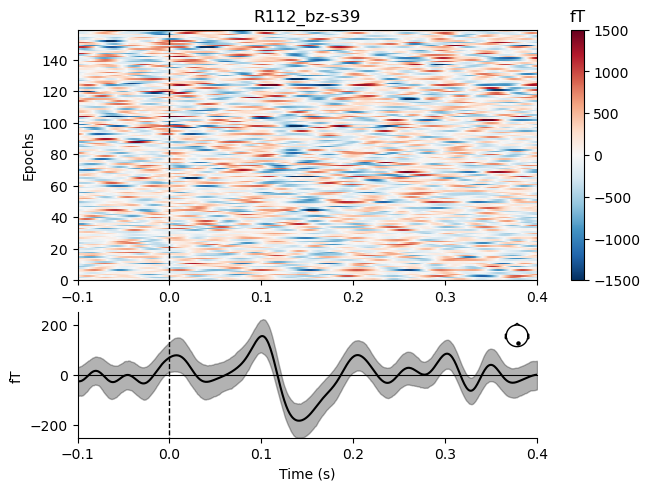

[<Figure size 640x480 with 4 Axes>]

In [5]:
epochs['cue_left'].copy().filter(0.0,30).crop(-0.1,0.4).plot_image(picks=['R112_bz-s39'], vmin=-1500, vmax=1500)

To plot a topographic map of the response at 113 ms write:

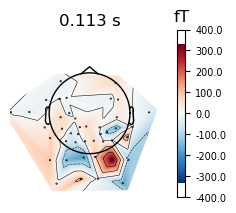

In [24]:
%matplotlib inline
evoked_left.plot_topomap(0.113, ch_type='mag', time_unit='s',show_names=False,size=1.5, res=128,image_interp='linear');

Now plot the topographic maps across all the time points

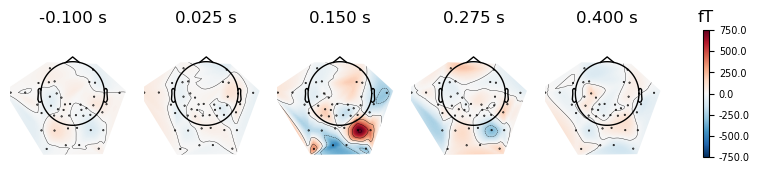

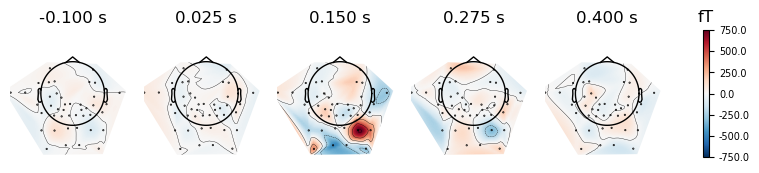

In [26]:
# Plot the topomaps across all these time points
time_ins = np.linspace(-0.1, 0.4, num=5)
evoked_left.plot_topomap(times=time_ins, ch_type='mag', time_unit='s')

In [ ]:

References

Woodman G.F. (2010) A brief introduction to the use of event-related potentials in studies of perception and attention. Atten Percept Psychophys. 72(8):2031-46.

Luck, S.J. (2014) An Introduction to the Event-Related Potential Technique, Second Edition. Bradford Books

(many of the recommendation for calculated event-related potentials also apply to calculating event-related fields)
